<a href="https://colab.research.google.com/github/gabrielborja/chocolate_making/blob/main/coating_process_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sugar syrup analytics

## Uploading necessary packages

In [ ]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021_sugar_syrup_data.xlsx

In [ ]:
#Uploading file from local drive ==> !rm file
from google.colab import files
uploaded1 = files.upload()

Saving 2021_sugar_syrup_data.xlsx to 2021_sugar_syrup_data.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_excel(io.BytesIO(uploaded1['2021_sugar_syrup_data.xlsx']))

In [ ]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Event            92 non-null     datetime64[ns]
 1   Year             92 non-null     int64         
 2   Month            92 non-null     object        
 3   Weeknum          92 non-null     int64         
 4   Weekday          92 non-null     object        
 5   Driamix_varming  92 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.4+ KB


##Data manipulation

In [ ]:
#Creating categorical values for multi-variate analysis
df1 = df1.assign(Team = np.where((df1['Event'].dt.day)<25, 'Team_1', 'Team_2'),
                 Shift = np.where((df1['Event'].dt.hour)<12, 'Day', 'Afternoon'),
                 Hour = df1['Event'].dt.hour)
df1.head(3)

,Event,Year,Month,Weeknum,Weekday,Driamix_varming,Team,Shift,Hour
0,2021-10-17 08:00:00,2021,October,41,Sunday,86,Team_1,Day,8
1,2021-10-17 09:00:00,2021,October,41,Sunday,88,Team_1,Day,9
2,2021-10-17 09:30:00,2021,October,41,Sunday,86,Team_1,Day,9


##Multi-variate Analysis

In [ ]:
#Creating list of categories
var_list = ['Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Hour']
var_list

['Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Hour']

In [ ]:
#Inspecting the proportion of data for different categories
@interact(Cat=var_list)
def proportion(Cat):
  return df1.value_counts(subset=Cat, normalize=True).reset_index(name='Proportion')

interactive(children=(Dropdown(description='Cat', options=('Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Ho…

In [ ]:
#Creating interactive visualization
@interact(Cat=var_list, Shift=['Shift', 'Team', None])
def plot_multi_variate(Cat, Shift):
  sns.boxplot(x=Cat, y='Driamix_varming', data=df1, hue=Shift)
  plt.title('Sugar Syrup Multi-variate Analysis')
  plt.legend(bbox_to_anchor=(1.25, 1)) #==> Set legend outside the chart
  plt.show()

interactive(children=(Dropdown(description='Cat', options=('Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Ho…

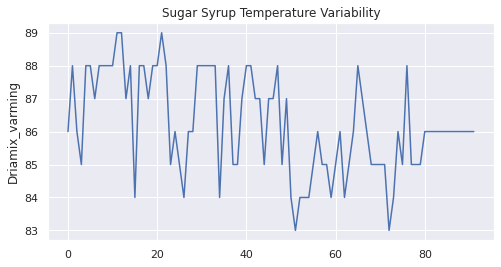

In [ ]:
#Plotting a scatter plot of the warming temperature
sns.lineplot(x=df1.index, y='Driamix_varming', data=df6)
plt.title('Sugar Syrup Temperature Variability')
plt.show()

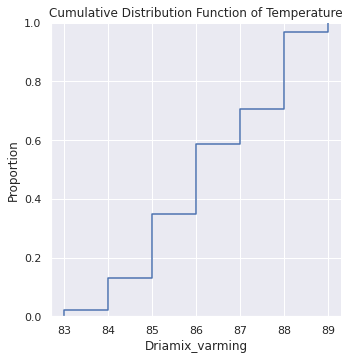

In [ ]:
#Plotting the Cumulative Distribution Function of the warming temperature
sns.displot(x='Driamix_varming', data=df1, kind='ecdf')
plt.title('Cumulative Distribution Function of Temperature')
plt.show()

#Packaging anomaly detection

## Uploading necessary packages

In [ ]:
#Upgrading Plotly
!pip install plotly --upgrade

In [ ]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
from ipywidgets import interact

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 5)})

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021-11-29_12_5_anom.xlsx

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded2 = files.upload()

In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df2 = pd.read_excel(io.BytesIO(uploaded2['2021-11-29_12_5_anom.xlsx']))

In [ ]:
#Checking the dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    1208 non-null   datetime64[ns]
 1   Num     1208 non-null   int64         
 2   Cat     1208 non-null   object        
 3   Trial   1208 non-null   object        
 4   Min     20 non-null     object        
 5   Delta   20 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 56.8+ KB


In [ ]:
#Checking the dataframe head
df2.head(1)

,Time,Num,Cat,Trial,Min,Delta
0,2021-11-29 12:30:11.277,0,Start,T1,00:00:21.700000,2021-11-29 00:00:21.700


##Data Visualization

In [ ]:
#Plotting the count of good pieces by trial number
def plot_good_count():
  df = df2[(df2['Cat']=='Good')].copy()
  df = df.groupby(by=['Trial']).agg(count = ('Num', 'count')).reset_index()
  x_orders = {'Trial': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10']}
  fig2_a = px.bar(data_frame=df, x='Trial', y='count', color='Trial',
                  title=f'Good bags produced until failure', height=500, width=800,
                  color_discrete_sequence=px.colors.qualitative.D3, category_orders=x_orders)
  fig2_a.show()

plot_good_count()

In [ ]:
#Plotting the anomalies detected vs time
def plot_anomaly_time():
  df = df2[(df2['Cat']=='Good') | (df2['Cat']=='WFD')].copy()
  fig2_b = px.scatter(data_frame=df, x='Time', y='Num', color='Cat',
                  title=f'Anomaly detected vs time', height=500, width=800,
                  color_discrete_sequence=px.colors.qualitative.D3)
  fig2_b.update_yaxes(type='category')
  fig2_b.show()

plot_anomaly_time()

In [ ]:
#Plotting the histogram of 
def plot_box_min():
  df = df2[(df2['Cat']=='WFD')].copy()
  fig2_c = px.box(data_frame=df, x='Delta',
                  title=f'Minutes elapsed until failure', height=500, width=800,
                  color_discrete_sequence=px.colors.qualitative.D3)
  fig2_c.show()

plot_box_min()

# Sugar waste

## Uploading necessary packages

In [ ]:
#Upgrading Plotly
!pip install plotly --upgrade

In [ ]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
from ipywidgets import interact

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 5)})

In [ ]:
#Remove previous versions of the uploaded excel file
!rm file_name.xlsx

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded3 = files.upload()

In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df3 = pd.read_excel(io.BytesIO(uploaded3['Sukkervrak Drage 2021.xlsx']), header=3)

In [ ]:
#Dropping unneccesary columns
df3 = df3[['dato', 'Periode', 'produkt', 'gruppe', 'Sukker sluk 1etg', 'Vrak UM-Sukker']]
df3 = df3.iloc[:68,:]

In [ ]:
#Checking the dataframe info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dato              68 non-null     datetime64[ns]
 1   Periode           68 non-null     object        
 2   produkt           68 non-null     object        
 3   gruppe            68 non-null     object        
 4   Sukker sluk 1etg  50 non-null     float64       
 5   Vrak UM-Sukker    18 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 3.3+ KB


## Data manipulation

In [ ]:
#Aggregatin data by categories
df3_gr = df3.groupby(by=['Periode']).agg(Slurry=('Sukker sluk 1etg', 'sum'), Filters=('Vrak UM-Sukker', 'sum')).reset_index()
df3_gr = df3_gr.assign(Total_waste = df3_gr['Slurry'] + df3_gr['Filters'])
df3_gr = df3_gr.replace(to_replace={'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun',
                                    '07':'Jul', '08':'Ago', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})
df3_gr

,Periode,Slurry,Filters,Total_waste
0,Jan,1899.0,625.0,2524.0
1,Feb,3414.0,1767.0,5181.0
2,Mar,2815.0,637.0,3452.0
3,Apr,4636.0,1304.0,5940.0
4,May,1241.0,1214.0,2455.0
5,Jun,584.0,0.0,584.0
6,Ago,1271.0,590.0,1861.0
7,Sep,2496.0,1383.0,3879.0
8,Oct,803.0,1235.0,2038.0
9,Nov,635.6,1197.0,1832.6


In [ ]:
#Exporting to excel in local disk
from google.colab import files
df3_gr.to_excel('sugar_waste_2021.xlsx', index=False) #==> Excluding index from file
files.download('sugar_waste_2021.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Visualization

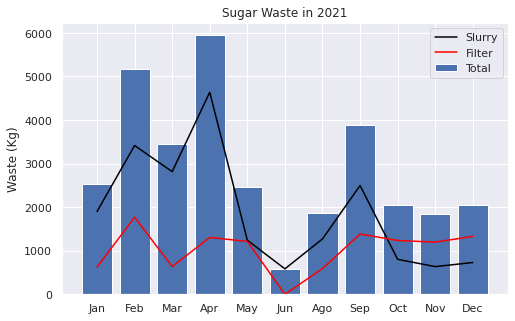

In [ ]:
#Plotting the sugar waste over time
plt.bar(df3_gr['Periode'], df3_gr['Total_waste'], label='Total')
plt.plot(df3_gr['Periode'], df3_gr['Slurry'], label='Slurry', color='black')
plt.plot(df3_gr['Periode'], df3_gr['Filters'], label='Filter', color='red')
plt.title('Sugar Waste in 2021')
plt.ylabel('Waste (Kg)')
plt.legend()
plt.show()

# Peanuts Analytics

## Uploading necessary packages

In [ ]:
# Upgrading plotly
#!pip install plotly --upgrade

In [ ]:
# Upgrading openpyxl
!pip install openpyxl --upgrade

In [ ]:
# Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
#import plotly.express as px

In [ ]:
# Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 6)})

In [ ]:
# Removing previous versions of the uploaded file
!rm file_name.xlsx

In [ ]:
# Uploading file from local drive
from google.colab import files
uploaded4 = files.upload()

In [ ]:
# Storing dataset in a Pandas Dataframe
import io
df4 = pd.read_excel(io.BytesIO(uploaded4['2022_peanuts_sampling.xlsx']))

In [ ]:
# Assigning time related categories
df4 = df4.assign(Year = df4['Dato'].dt.year,
                 Weeknum = df4['Dato'].dt.isocalendar().week)

## Data Visualization

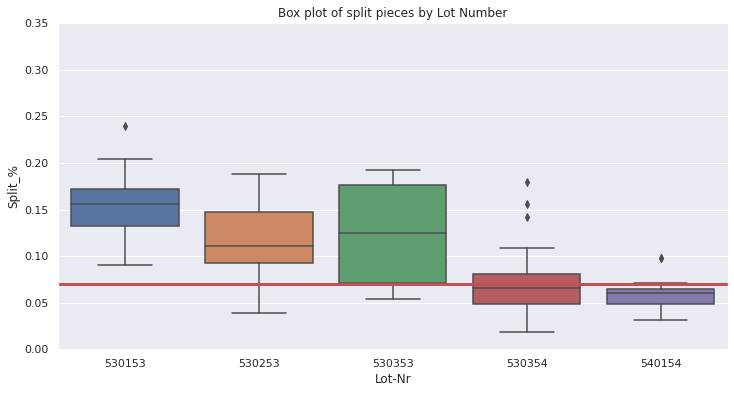

In [ ]:
# Plotting the half peanuts variability over time
sns.boxplot(x='Lot-Nr', y='Split_%', data=df4) #hue='Skift', hue_order=['Dag', 'Kveld', 'Natt'])
plt.title('Box plot of split pieces by Lot Number')
plt.axhline(y=0.07, color='r', linewidth=3, linestyle='-')
plt.ylim([0, 0.35])
#plt.legend(bbox_to_anchor=(1.05, 1)) #==> Set legend outside the chart
plt.show()

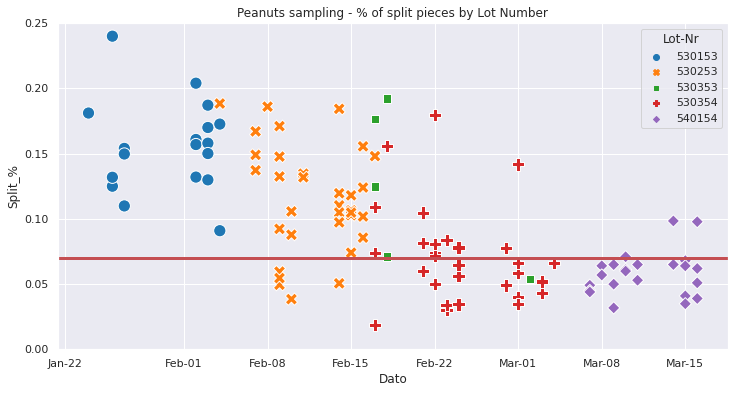

In [ ]:
# Plotting the half peanuts variability over time
fig4 = sns.scatterplot(x='Dato', y='Split_%', data=df4, style='Lot-Nr', hue='Lot-Nr', palette='tab10', s=150)
xformatter = mdates.DateFormatter("%b-%d")
fig4.xaxis.set_major_formatter(xformatter)
plt.title('Peanuts sampling - % of split pieces by Lot Number')
plt.axhline(y=0.07, color='r', linewidth=3, linestyle='-')
plt.ylim([0, 0.25])
#plt.legend(bbox_to_anchor=(1.15, 1)) #==> Set legend outside the chart
plt.show()

# Peanuts Waste Forecasting

## Uploading necessary packages

In [ ]:
# Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from scipy.stats import linregress
from ipywidgets import interact

In [ ]:
# Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 6)})

In [ ]:
# Removing previous versions of the uploaded file
!rm file_name.xlsx

In [ ]:
# Uploading file from local drive
from google.colab import files
uploaded5 = files.upload()

In [ ]:
# Storing dataset in a Pandas Dataframe
import io
df5 = pd.read_excel(io.BytesIO(uploaded5['2022_korpus_waste.xlsx']))

In [ ]:
# Assigning time related categories and base cost
df5 = df5.assign(Year = df5['Date'].dt.year,
                 Weeknum = df5['Date'].dt.isocalendar().week,
                 Month = df5['Date'].dt.month_name(),
                 NOK = df5['M_Korpus']*37.48)

In [ ]:
# Adding a cumulative cost column
df5 = df5.assign(Korpus_Cum = df5['M_Korpus'].cumsum(),
                 Korpus_change = df5['M_Korpus'].pct_change(),
                 Korpus_delta = df5['M_Korpus'].diff(),
                 Korpus_rol_7 = df5[['Date', 'M_Korpus']].rolling(7).mean(),
                 Korpus_rol_14 = df5[['Date', 'M_Korpus']].rolling(14).mean(),
                 Korpus_rol_21 = df5[['Date', 'M_Korpus']].rolling(21).mean(),
                 Korpus_delta_21 = df5[['Date', 'Korpus_delta']].rolling(21).mean(),
                 Cum_Cost = df5['NOK'].cumsum())

In [ ]:
# Checking the dataframe tail
df5.tail(1)

,Date,M_Korpus,Year,Weeknum,Month,NOK,Korpus_Cum,Korpus_change,Korpus_delta,Korpus_rol_7,Korpus_rol_14,Korpus_rol_21,Cum_Cost,Korpus_delta_21
66,2022-03-15,46,2022,11,March,1724.08,4302,-0.021277,-1.0,66.285714,35.428571,46.904762,161238.96,-0.857143


## Data Visualization

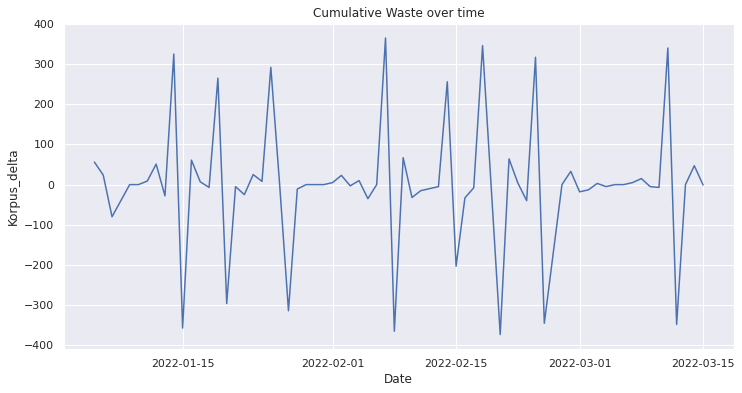

In [ ]:
# Plotting the cumulative waste
sns.lineplot(x='Date', y='Korpus_delta', data=df5)
plt.title('Cumulative Waste over time')
plt.show()

In [ ]:
# Grouping by week number and aggregating the cost
df5_wk = df5.groupby(['Year', 'Weeknum']).agg(Weekly_Cost = ('Cum_Cost', 'sum')).reset_index()
df5_wk

In [ ]:
# Building a linear regression model by week on the cumulative cost

x5 = np.arange(1, 60)
y5 = np.array(df5['Cum_Cost'])
x_365 = np.arange(1, 330)
lreg_5 = linregress(x5, y5)
lreg_365 = 'fitted-line: ' + str(round((lreg_5.slope*330 + lreg_5.intercept),1))

In [ ]:
# Plotting the cumulative cost and forecast

fig5 = sns.scatterplot(x=x5, y='Cum_Cost', data=df5, palette='tab10', label='baseline')
fig5.plot(x_365, lreg_5.slope*x_365 + lreg_5.intercept, 'r' , label='forecast')
plt.title('Peanuts Waste Cost Forecast 2022')
plt.legend()
plt.show()

In [ ]:
# Plotting multiple plot of waste and % split (df4)

rol_window = ['Korpus_rol_7', 'Korpus_rol_14', 'Korpus_rol_21', 'Korpus_delta_21']

@interact(Rolling_avg = rol_window)
def plot_waste_trend(Rolling_avg):
  fig5_a, axs = plt.subplots(2, sharex=True)
  fig5_a.suptitle('% of Split vs Peanuts Waste')
  sns.lineplot(x='Dato', y='Split_%', data=df4, ci=False, ax=axs[0])
  sns.lineplot(x='Date', y=Rolling_avg, data=df5, ax=axs[1], color='#007FFF')
  plt.show()

interactive(children=(Dropdown(description='Rolling_avg', options=('Korpus_rol_7', 'Korpus_rol_14', 'Korpus_ro…

In [ ]:
@interact(Rolling_avg = rol_window)
def plot_rolling_avg(Rolling_avg):
  fig5_b = sns.barplot(x=df5.index, y=Rolling_avg, data=df5)
  plt.title("Cumulative waste vs events")
  #fig5_b.set_yscale("log")
  plt.show()

# Overtime Analytics

## Uploading necessary packages

In [1]:
# Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress
from ipywidgets import interact

In [2]:
# Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 6)})

In [ ]:
# Removing previous versions of the uploaded file
!rm file_name.xlsx

In [ ]:
# Uploading file from local drive
from google.colab import files
uploaded6 = files.upload()

In [4]:
# Storing dataset in a Pandas Dataframe
import io
df6 = pd.read_excel(io.BytesIO(uploaded6['2022_overtime.xlsx']))

## Data Manipulation

In [ ]:
# Selecting columns
df6 = df6[['Date', 'Week', 'Month', 'Volume', 'Performance', 'Sick_Leave', 'Cleaning', 'Maintenance', 'Other', 'Cost', 'Total_Time']]
df6.tail(2)

In [ ]:
# Assigning categorical values to Cost column
df6 = df6.assign(Category = np.where(df6['Performance'].isnull(),"Other", "Performance"))

In [ ]:
# Melting 1st dataframe and aggregating by week number and hours

df6_hr = df6.melt(id_vars=['Week'], value_vars=['Volume', 'Performance', 'Sick_Leave', 'Cleaning', 'Maintenance', 'Other'], var_name='Category', value_name='Hours')
df6_hr['Hours'] = df6_hr['Hours'].fillna(0)
df6_hr

In [ ]:
# Grouping by Cat and aggregating with sum
df6_hr = df6_hr.groupby(by=['Week', 'Category']).agg(Hours = ('Hours', 'sum')).reset_index()
df6_hr

In [ ]:
# Grouping by to create 2nd dataframe with costs by month and week

df6_co = df6.groupby(by=['Week', 'Category']).agg(Cost = ('Cost', 'sum')).reset_index()
df6_co

## Data Visualization

In [ ]:
# Visualizing overtime hours by week
fig6_a = px.bar(data_frame=df6_hr, x='Week', y='Hours', color='Category',
       title='Drage Overtime in 2022', height=600, width=600)
fig6_a.update_layout(title_x=0.5)
fig6_a.show()

In [ ]:
# Visualizing overtime costs by week
fig6_b = px.bar(data_frame=df6_co, x='Week', y='Cost', color='Category',
       title='Drage Overtime Costs in 2022', height=600, width=600)
fig6_b.update_layout(title_x=0.5)
fig6_b.show()